In [12]:
# Data processing
import numpy as np
import xarray as xr
from pathlib import Path
# Visualization
import matplotlib as mpl
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
plt.rcParams['mathtext.default'] = 'regular'
publish = True
if publish:
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 20
    mpl.rcParams['axes.titlesize'] = 22
    mpl.rcParams['axes.labelsize'] = 20
    plt.rcParams['font.size'] = 16
path_to_figs = Path('/local/mwe14avu/UEA/PhD/thesis/ch3/ch3_pics')

In [2]:
path_to_atom = Path('../../../../../../../obs/ATom/nc/data')
# Select flights
fname_atom_flight_1607 = 'MER-WAS_DC8_20160729_R14.nc'
fname_atom_flight_1608 = 'MER-WAS_DC8_201608*.nc'
fname_atom_flight_1701 = 'MER-WAS_DC8_201701*.nc'
fname_atom_flight_1702 = 'MER-WAS_DC8_201702*.nc'
# Read ATom data
atom_dsmms_1607 = xr.open_dataset(path_to_atom / fname_atom_flight_1607, group='MMS', decode_cf=True)
atom_dsmms_1608 = xr.open_mfdataset(sorted(path_to_atom.glob(fname_atom_flight_1608)), group='MMS', decode_cf=True)
atom_dsmms_1701 = xr.open_mfdataset(sorted(path_to_atom.glob(fname_atom_flight_1701)), group='MMS', decode_cf=True)
atom_dsmms_1702 = xr.open_mfdataset(sorted(path_to_atom.glob(fname_atom_flight_1702)), group='MMS', decode_cf=True)

In [3]:
# Extract spatial coordinates from ATom data
sample_lats_1607 = np.asarray(atom_dsmms_1607.G_LAT.data) 
sample_lons_1607 = np.asarray(atom_dsmms_1607.G_LONG.data)
sample_lats_1608 = np.asarray(atom_dsmms_1608.G_LAT.data) 
sample_lons_1608 = np.asarray(atom_dsmms_1608.G_LONG.data)
sample_lats_1701 = np.asarray(atom_dsmms_1701.G_LAT.data) 
sample_lons_1701 = np.asarray(atom_dsmms_1701.G_LONG.data)
sample_lats_1702 = np.asarray(atom_dsmms_1702.G_LAT.data) 
sample_lons_1702 = np.asarray(atom_dsmms_1702.G_LONG.data)

In [4]:
# print(sample_lons_1608[540], sample_lats_1608[540])
# print(sample_lons_1608[541], sample_lats_1608[541])
# print(sample_lons_1608[542], sample_lats_1608[542])

In [5]:
# Exclude one data point that seems to be out of place
sample_lons_1608[541], sample_lats_1608[541] = None, None

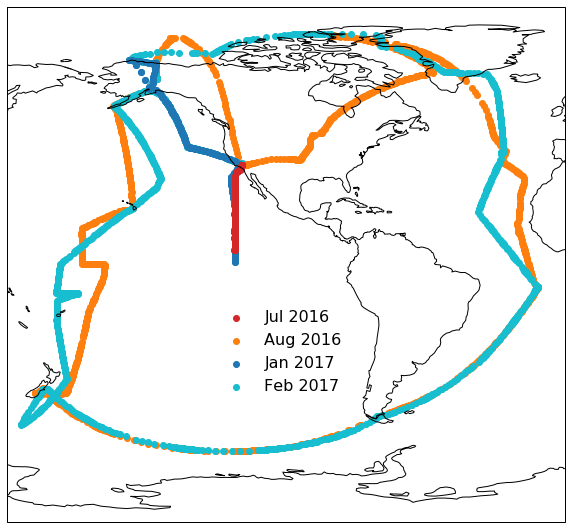

In [13]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)), facecolor='w')
ax.scatter(sample_lons_1607, sample_lats_1607, transform=ccrs.PlateCarree(), color='C3', marker='o', label='Jul 2016')
ax.scatter(sample_lons_1608, sample_lats_1608, transform=ccrs.PlateCarree(), color='C1', marker='o', label='Aug 2016')
ax.scatter(sample_lons_1701, sample_lats_1701, transform=ccrs.PlateCarree(), color='C0', marker='o', label='Jan 2017')
ax.scatter(sample_lons_1702, sample_lats_1702, transform=ccrs.PlateCarree(), color='C9', marker='o', label='Feb 2017')
ax.scatter(sample_lons_1701, sample_lats_1701, transform=ccrs.PlateCarree(), color='C0', marker='o')
ax.scatter(sample_lons_1607, sample_lats_1607, transform=ccrs.PlateCarree(), color='C3', marker='o')
ax.coastlines()
ax.set_extent([-200, -5, -90, 90], crs=ccrs.PlateCarree())
# ax.legend(loc='lower right', frameon=False, bbox_to_anchor=(1,0.07));
ax.legend(loc='center', frameon=False, bbox_to_anchor=(0.49,0.33));
fig.savefig(path_to_figs / f'atom_flight_tracks.png', bbox_inches='tight')